# Color Threshold, Blue Screen

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

In [2]:
image = cv2.imread(".\images\pizza_bluescreen.jpg")

In [4]:
print("This image is:", type(image), 
     " with dimensions:", image.shape)

This image is: <class 'numpy.ndarray'>  with dimensions: (514, 816, 3)


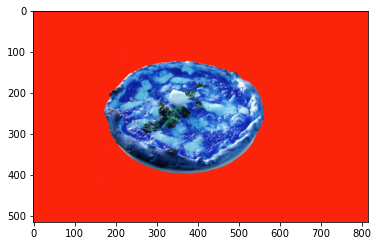

In [5]:
plt.imshow(image)

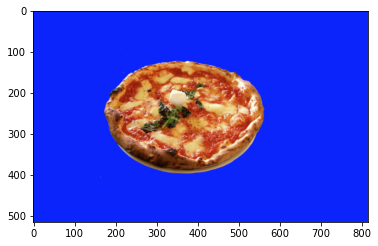

In [6]:
image_copy = np.copy(image)

#Change the color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

__Define the color threshold__

In [19]:
lower_blue = np.array([0,0,230])
upper_blue = np.array([250,250,255])

__Create mask__

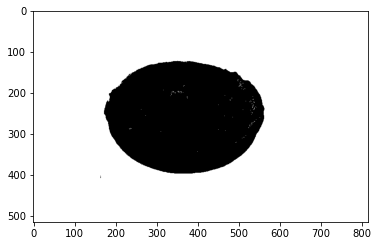

In [20]:
mask = cv2.inRange(image_copy, lower_blue, upper_blue)
plt.imshow(mask, cmap="gray")

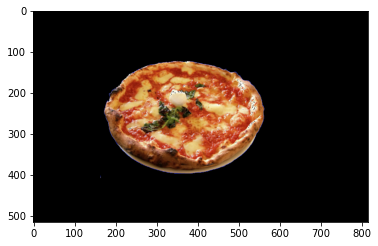

In [21]:
#Mask the image to let the pizza show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0,0,0]

plt.imshow(masked_image)

__Mask and add a background image__

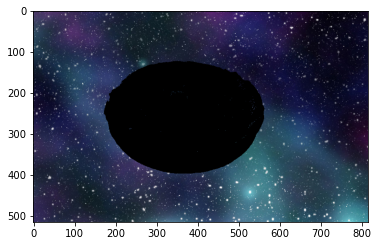

In [22]:
background_image = cv2.imread(".\images\space_background.jpg")
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

#Crop it to the right size
crop_background = background_image[0:514, 0:816]

#Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0,0,0]

plt.imshow(crop_background)

__Create a complete image__

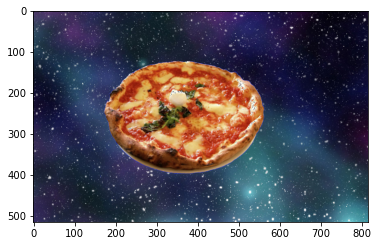

In [23]:
complete_image = masked_image + crop_background

plt.imshow(complete_image)